# ORGANICS

In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')

from sklearn.metrics import accuracy_score

data = pd.read_csv('/Users/giniatullinaalsuzamilevna/Desktop/Data/DATA-ANALYSYS_2-master/Dataset/ORGANICS.csv',encoding="cp1251")

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [119]:
print(data.shape)

(22223, 13)


In [120]:
data = data.dropna()

data.isnull().any().any()

False

# **Кросс-валидация**

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [122]:
x = data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y = data.values[::,10]
y = y.astype('int')

In [123]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
DT = DecisionTreeClassifier(max_depth=42, random_state=13).fit(X_train, y_train)

print("Правильность на обуч наборе: {:.2f}".format(DT.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(DT.score(X_test, y_test)))

Правильность на обуч наборе: 1.00
Правильность на тестовом наборе: 0.97


In [124]:
y_pred_train = DT.predict(X_train)
accuracy_score(y_pred_train, y_train)

1.0

In [125]:
y_pred = DT.predict(X_test)
accuracy_score(y_pred, y_test)

0.9736842105263158

# **Перекрестная проверка**

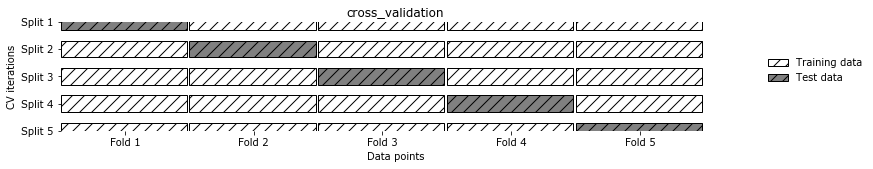

In [126]:
mglearn.plots.plot_cross_validation()

In [127]:
DT = DecisionTreeClassifier(max_depth=42)

На обучающей выборке:

In [128]:
scores = cross_val_score(DT, iris.data, iris.target, cv=3)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.98039216 0.92156863 1.        ]


In [129]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.97


На тестовой выборке:

In [130]:
scores = cross_val_score(DT, iris.data, iris.target, cv=2)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.96       0.94666667]


In [131]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.95


**Перекрестная проверка с исключением по одному**


In [132]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(DT, iris.data, iris.target, cv=loo)
print("Количество итераций cv: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций cv:  150
Средняя правильность: 0.95


**Перекрестная проверка со случайными перестановками при разбиении**

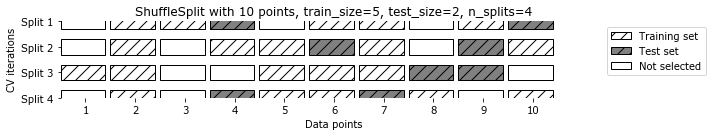

In [133]:
mglearn.plots.plot_shuffle_split()

In [134]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(DT, iris.data, iris.target, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.92       0.97333333 0.94666667 0.94666667 0.89333333 0.94666667
 0.93333333 0.93333333 0.96       0.94666667]


# Определение гиперпараметров алгоритма с помощью кросс-валидации

In [144]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(DecisionTreeClassifier(random_state=13),
                  param_grid = {'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, None],
                                'max_features' : ['auto', 'log2', None],
                                'min_samples_leaf' : range(1, 10),
                                'min_samples_split' : range(2, 10),
                                'criterion' : ['gini', 'entropy']},
                  cv=5, scoring='accuracy'
                  ).fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [143]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [141]:
gs.best_score_

0.9464285714285714